In [100]:
import pandas as pd

In [101]:
Netflix_Data = pd.read_csv('titles.csv')

In [102]:
Netflix_Data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


# Estructura del data-set

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

id: The title ID on JustWatch.
title: The name of the title.
show_type: TV show or movie.
description: A brief description.
release_year: The release year.
age_certification: The age certification.
runtime: The length of the episode (SHOW) or movie.
genres: A list of genres.
production_countries: A list of countries that produced the title.
seasons: Number of seasons if it's a SHOW.
imdb_id: The title ID on IMDB.
imdb_score: Score on IMDB.
imdb_votes: Votes on IMDB.
tmdb_popularity: Popularity on TMDB.
tmdb_score: Score on TMDB.

In [103]:
Netflix_Data.shape

(5850, 15)

In [104]:
Netflix_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

In [105]:
Netflix_Data['type'].unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [106]:
Netflix_Data['genres'].unique()

array(["['documentation']", "['drama', 'crime']",
       "['drama', 'action', 'thriller', 'european']", ...,
       "['drama', 'animation', 'music']",
       "['animation', 'family', 'scifi']",
       "['documentation', 'music', 'reality']"], dtype=object)

In [107]:
len( Netflix_Data['genres'].unique() )

1726

In [108]:
Netflix_Data['age_certification'].unique()

array(['TV-MA', 'R', 'PG', nan, 'TV-14', 'PG-13', 'TV-PG', 'TV-Y', 'TV-G',
       'TV-Y7', 'G', 'NC-17'], dtype=object)

In [109]:
Netflix_Data['production_countries'].unique()

array(["['US']", "['GB']", "['GB', 'US']", "['EG']", "['DE']", "['IN']",
       "['SU', 'IN']", "['LB', 'CA', 'FR']", '[]', "['LB']",
       "['DZ', 'EG']", "['CA', 'FR', 'LB']", "['US', 'GB']",
       "['US', 'IT']", "['JP']", "['AR']", "['FR', 'EG']", "['FR', 'LB']",
       "['CA', 'US']", "['US', 'FR']", "['JP', 'US']", "['US', 'CA']",
       "['DE', 'US']", "['PE', 'US', 'BR']", "['IT', 'US', 'FR']",
       "['IE', 'GB', 'DE', 'FR']", "['HK', 'US']", "['AU']", "['FR']",
       "['DE', 'GH', 'GB', 'US', 'BF']", "['MX']", "['ES', 'AR']",
       "['CO']", "['PS', 'US', 'FR', 'DE']", "['FR', 'NO', 'LB', 'BE']",
       "['BE', 'FR', 'IT', 'LB']", "['TR']", "['IN', 'SU']", "['DK']",
       "['CA']", "['DE', 'GB', 'US', 'BS', 'CZ']", "['MT', 'GB', 'US']",
       "['AU', 'DE', 'GB', 'US']", "['US', 'JP']", "['BE', 'US']",
       "['HK']", "['IT']", "['US', 'FR', 'DE', 'GB']",
       "['GB', 'US', 'FR', 'DE']", "['IT', 'US']", "['US', 'ZA']",
       "['GB', 'ES']", "['GB', 'US', 'JP']", "['

In [110]:
Netflix_Data.isnull().sum() / len(Netflix_Data)

id                      0.000000
title                   0.000171
type                    0.000000
description             0.003077
release_year            0.000000
age_certification       0.447692
runtime                 0.000000
genres                  0.000000
production_countries    0.000000
seasons                 0.640000
imdb_id                 0.068889
imdb_score              0.082393
imdb_votes              0.085128
tmdb_popularity         0.015556
tmdb_score              0.053162
dtype: float64

# Resumen Estadístico Descriptivo Básico <a class="anchor" id="9"></a>

In [111]:
Netflix_Data.describe(include='all') # include='all' para dar un tratamiento diferente a las categoricas que a las cuantitativas

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850,5849,5850,5832,5850.000000,3231,5850.000000,5850,5850,2106.000000,5447,5368.000000,5.352000e+03,5759.000000,5539.000000
unique,5850,5798,2,5829,NaN,11,NaN,1726,452,NaN,5447,NaN,NaN,NaN,NaN
top,ts300399,The Gift,MOVIE,Five families struggle with the ups and downs ...,NaN,TV-MA,NaN,['comedy'],['US'],NaN,tt0075314,NaN,NaN,NaN,NaN
freq,1,3,3744,2,NaN,883,NaN,484,1959,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2016.417094,NaN,76.888889,NaN,NaN,2.162868,NaN,6.510861,2.343938e+04,22.637925,6.829175
std,NaN,NaN,NaN,NaN,6.937726,NaN,39.002509,NaN,NaN,2.689041,NaN,1.163826,9.582047e+04,81.680263,1.170391
min,NaN,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,1.000000,NaN,1.500000,5.000000e+00,0.009442,0.500000
25%,NaN,NaN,NaN,NaN,2016.000000,NaN,44.000000,NaN,NaN,1.000000,NaN,5.800000,5.167500e+02,2.728500,6.100000
50%,NaN,NaN,NaN,NaN,2018.000000,NaN,83.000000,NaN,NaN,1.000000,NaN,6.600000,2.233500e+03,6.821000,6.900000
75%,NaN,NaN,NaN,NaN,2020.000000,NaN,104.000000,NaN,NaN,2.000000,NaN,7.300000,9.494000e+03,16.590000,7.537500


### 4.3.3. Análisis gráfico variables cuantitativas <a class="anchor" id="10"></a>

#### 4.3.3.1. Histogramas para las variables cuantitativas <a class="anchor" id="11"></a>

In [112]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

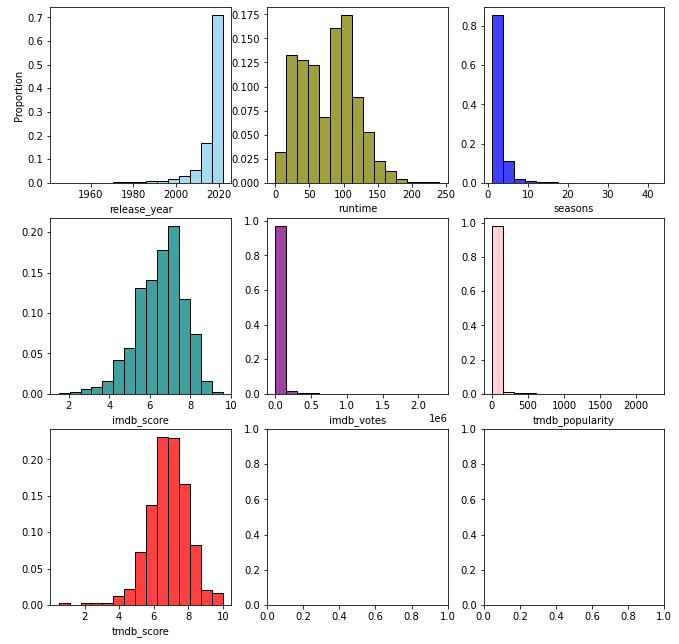

In [113]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue", ax=axs[0, 0])
 

p2 = sns.histplot(data=Netflix_Data, x="runtime", stat="proportion", bins=15, color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
 

p3 = sns.histplot(data=Netflix_Data, x="seasons", stat="proportion", bins=15, color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
 

p4 = sns.histplot(data=Netflix_Data, x="imdb_score", stat="proportion", bins=15, color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
 

p5 = sns.histplot(data=Netflix_Data, x="imdb_votes", stat="proportion", bins=15, color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
 

p6 = sns.histplot(data=Netflix_Data, x="tmdb_popularity", stat="proportion", bins=15, color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
 
 
p7 = sns.histplot(data=Netflix_Data, x="tmdb_score", stat="proportion", bins=15, color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
 

plt.show()

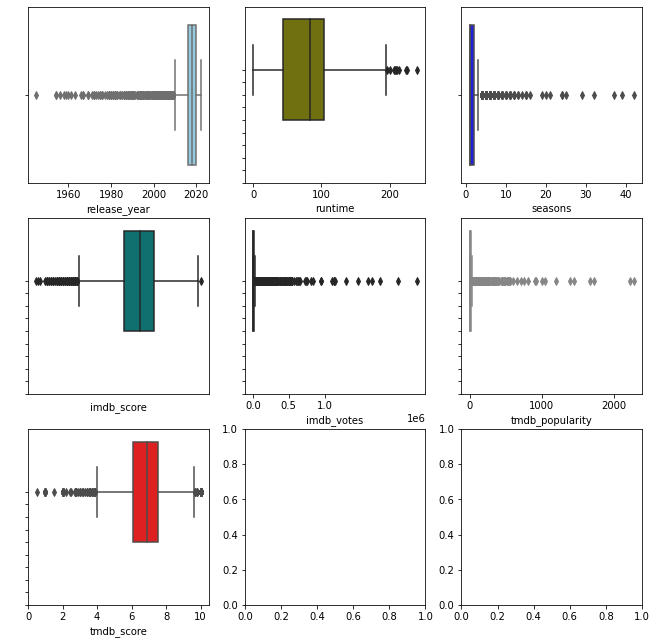

In [114]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue", ax=axs[0, 0])
 

p2 = sns.boxplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
p2.set_xticks( range(int(Netflix_Data['runtime'].min()) , int(Netflix_Data['runtime'].max()) , 100) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p3 = sns.boxplot(data=Netflix_Data, x="seasons", color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
 

p4 = sns.boxplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
p4.set_xticks( range(int(Netflix_Data['imdb_score'].min()) , int(Netflix_Data['imdb_score'].max()) , 300) )
p4.set_yticks( np.arange(0, 1, 0.1)  )

p5 = sns.boxplot(data=Netflix_Data, x="imdb_votes", color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
p5.set_xticks( range(int(Netflix_Data['imdb_votes'].min()) , int(Netflix_Data['imdb_votes'].max()/2) , 500000) )
p5.set_yticks( np.arange(0, 1, 0.1)  )

p6 = sns.boxplot(data=Netflix_Data, x="tmdb_popularity", color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
p6.set_xticks( range(int(Netflix_Data['tmdb_popularity'].min()) , int(Netflix_Data['tmdb_popularity'].max()+1) , 1000) )
p6.set_yticks( np.arange(0, 1, 0.1)  )
 
p7 = sns.boxplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 2) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

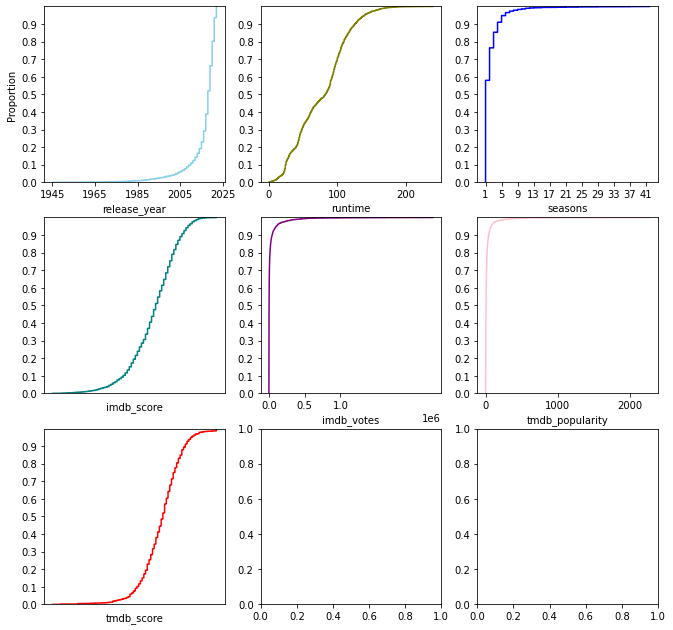

In [115]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.ecdfplot(data=Netflix_Data, x="release_year", color="skyblue", ax=axs[0, 0])
p1.set_xticks( range(int(Netflix_Data['release_year'].min()) , int(Netflix_Data['release_year'].max()+20) , 20) )
p1.set_yticks( np.arange(0, 1, 0.1)  )

p2 = sns.ecdfplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
p2.set_xticks( range(int(Netflix_Data['runtime'].min()) , int(Netflix_Data['runtime'].max()) , 100) )
p2.set_yticks( np.arange(0, 1, 0.1)  )

p3 = sns.ecdfplot(data=Netflix_Data, x="seasons", color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
p3.set_xticks( range(int(Netflix_Data['seasons'].min()) , int(Netflix_Data['seasons'].max()) , 4) )
p3.set_yticks( np.arange(0, 1, 0.1)  )

p4 = sns.ecdfplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
p4.set_xticks( range(int(Netflix_Data['imdb_score'].min()) , int(Netflix_Data['imdb_score'].max()) , 300) )
p4.set_yticks( np.arange(0, 1, 0.1)  )

p5 = sns.ecdfplot(data=Netflix_Data, x="imdb_votes", color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
p5.set_xticks( range(int(Netflix_Data['imdb_votes'].min()) , int(Netflix_Data['imdb_votes'].max()/2) , 500000) )
p5.set_yticks( np.arange(0, 1, 0.1)  )

p6 = sns.ecdfplot(data=Netflix_Data, x="tmdb_popularity", color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
p6.set_xticks( range(int(Netflix_Data['tmdb_popularity'].min()) , int(Netflix_Data['tmdb_popularity'].max()+1) , 1000) )
p6.set_yticks( np.arange(0, 1, 0.1)  )
 
p7 = sns.ecdfplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 50) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

## Analisis con  variables cuantitativas recortadas (trimmed)

In [116]:
def Trimmed_Outliers(df, variable_name):

    Q1 = df[variable_name].quantile(q=0.25)
    Q3 = df[variable_name].quantile(q=0.75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5*IQR

    lower_bound = Q1 - 1.5*IQR

    variable_trimmed = df.loc[ ( df[variable_name] >= lower_bound ) &  ( df[variable_name] <= upper_bound ) , variable_name ]

    return(variable_trimmed)

In [117]:
n_outliers = []
n_not_outliers = []

Quantitative_columns = ['release_year', 'runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

for i in Quantitative_columns :

    n_outliers.append( Netflix_Data[i].count() - Trimmed_Outliers( Netflix_Data, i ).count() )

    n_not_outliers.append( Trimmed_Outliers( Netflix_Data, i ).count() )


df_outliers = pd.DataFrame({'Quantitative_columns':Quantitative_columns , 'n_outliers':n_outliers , 'n_not_outliers':n_not_outliers})

df_outliers['prop_outliers'] = df_outliers['n_outliers'] / (df_outliers['n_outliers'] + df_outliers['n_not_outliers'])

In [118]:
df_outliers

,Quantitative_columns,n_outliers,n_not_outliers,prop_outliers
0,release_year,574,5276,0.098120
1,runtime,10,5840,0.001709
2,seasons,309,1797,0.146724
3,imdb_score,89,5279,0.016580
4,imdb_votes,820,4532,0.153214
5,tmdb_popularity,661,5098,0.114777
6,tmdb_score,155,5384,0.027983


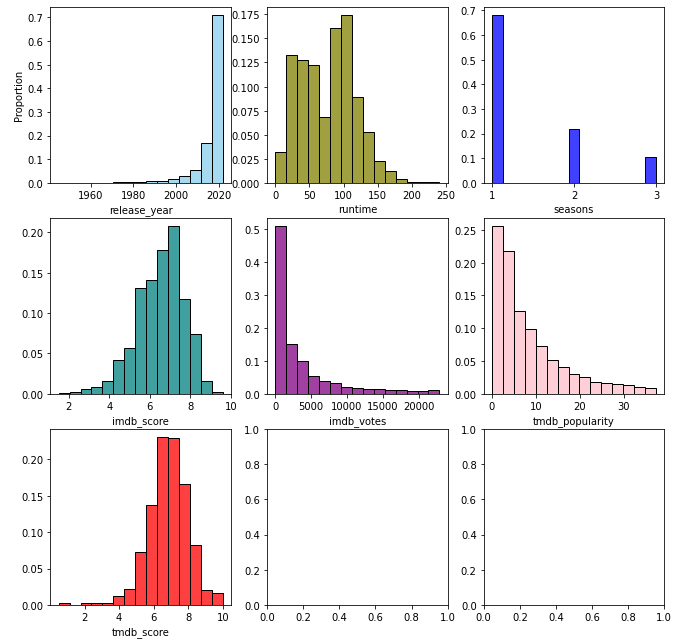

In [119]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.histplot(data=Netflix_Data, x="release_year", stat="proportion", bins=15, color="skyblue", ax=axs[0, 0])
 

p2 = sns.histplot(data=Netflix_Data, x="runtime", stat="proportion", bins=15, color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')


p3 = sns.histplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'seasons')) , x="seasons", stat="proportion", bins=15, color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
p3.set_xticks( [1,2,3] )


p4 = sns.histplot(data=Netflix_Data, x="imdb_score", stat="proportion", bins=15, color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')


p5 = sns.histplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'imdb_votes')) , x="imdb_votes", stat="proportion", bins=15, color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')


p6 = sns.histplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'tmdb_popularity')), x="tmdb_popularity", stat="proportion", bins=15, color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
 
 
p7 = sns.histplot(data=Netflix_Data, x="tmdb_score", stat="proportion", bins=15, color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')


plt.show()

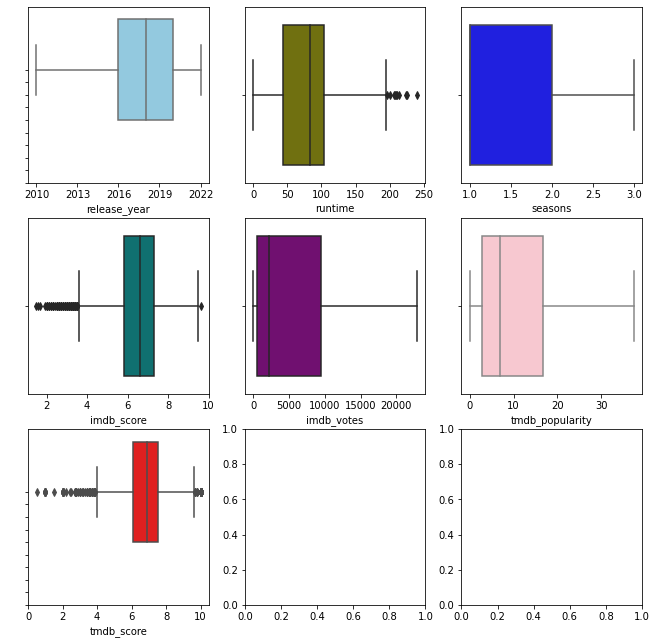

In [120]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.boxplot(data=Netflix_Data, x="release_year", color="skyblue", showfliers = False, ax=axs[0, 0])
p1.axes.set(xlabel='release_year', ylabel=' ')
p1.set_xticks( range(  2010 , 2024, 3) )
p1.set_yticks( np.arange(0, 1, 0.1) )

p2 = sns.boxplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')

p3 = sns.boxplot(data=Netflix_Data, x="seasons", color="blue", showfliers = False, ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')

p4 = sns.boxplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')


p5 = sns.boxplot(data=Netflix_Data, x="imdb_votes", color="purple", showfliers = False , ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')

p6 = sns.boxplot(data=Netflix_Data, x="tmdb_popularity", color="pink", showfliers = False, ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')

p7 = sns.boxplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
p7.set_xticks( range(int(Netflix_Data['tmdb_score'].min()) , int(Netflix_Data['tmdb_score'].max()+1) , 2) )
p7.set_yticks( np.arange(0, 1, 0.1)  )

plt.show()

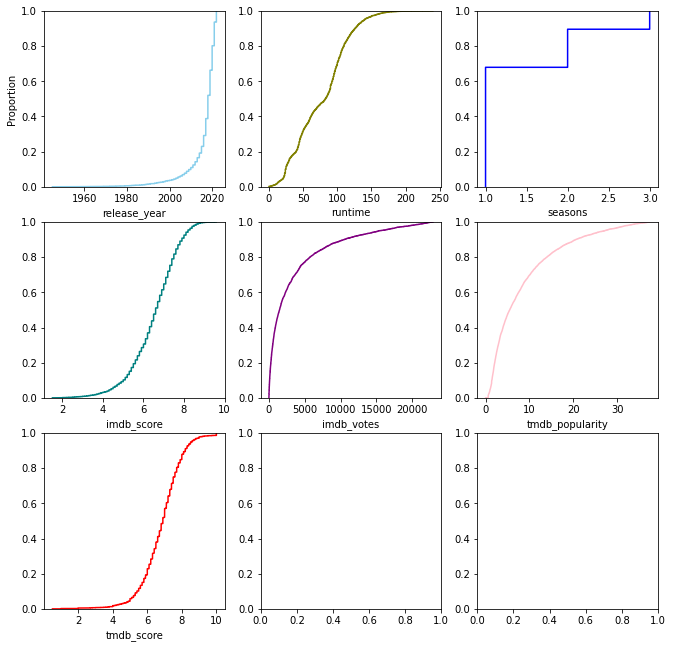

In [121]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.ecdfplot(data=Netflix_Data, x="release_year", color="skyblue", ax=axs[0, 0])
 

p2 = sns.ecdfplot(data=Netflix_Data, x="runtime",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='runtime', ylabel=' ')
 

p3 = sns.ecdfplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'seasons')), x="seasons", color="blue", ax=axs[0, 2])
p3.axes.set(xlabel='seasons', ylabel=' ')
 

p4 = sns.ecdfplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
 

p5 = sns.ecdfplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'imdb_votes')) , x="imdb_votes", color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
 

p6 = sns.ecdfplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'tmdb_popularity')) , x="tmdb_popularity", color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
 
 
p7 = sns.ecdfplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
 

plt.show()

Variables categoricas

type, age_certification , genres, production_countries

In [122]:
Netflix_Data.type.unique()

array(['SHOW', 'MOVIE'], dtype=object)

In [123]:
proportion_Movie = len( Netflix_Data.loc[ Netflix_Data['type']==0 , :] ) / len(Netflix_Data)
proportion_Show = len( Netflix_Data.loc[ Netflix_Data['type']==1 , :] ) / len(Netflix_Data)

In [124]:
Netflix_Data['proportion_type'] = 0


for i in range(0, len(Netflix_Data)):

    if Netflix_Data['type'][i] == 0 :

        Netflix_Data['proportion_type'][i] = proportion_Movie

    else :

        Netflix_Data['proportion_type'][i] = proportion_Show

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11864\4107049702.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Netflix_Data['proportion_type'][i] = proportion_Show


[Text(0.5, 0, 'type'), Text(0, 0.5, 'proportion')]

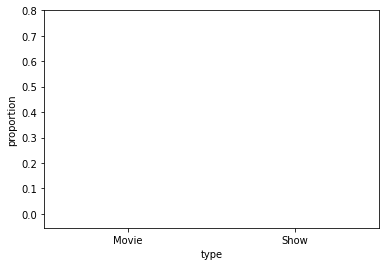

In [125]:
p1 = sns.barplot(x='type', y='proportion_type', data=Netflix_Data) 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['Movie', 'Show'])
p1.axes.set(xlabel='type', ylabel='proportion')

In [126]:
[ proportion_Movie , proportion_Show ]

[0.0, 0.0]

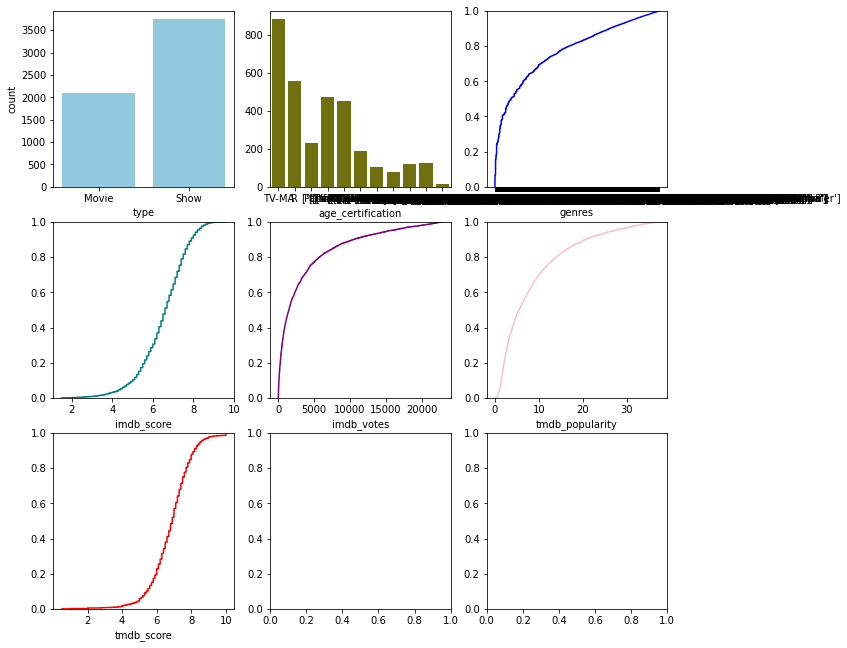

In [127]:
fig, axs = plt.subplots(3, 3, figsize=(11, 11))

p1 = sns.countplot(data=Netflix_Data, x="type", color="skyblue", ax=axs[0, 0])
p1.set_xticklabels(['Movie', 'Show'])
p1.axes.set(xlabel='type', ylabel='count') 

p2 = sns.countplot(data=Netflix_Data, x="age_certification",  color="olive", ax=axs[0, 1])
p2.axes.set(xlabel='age_certification', ylabel=' ')
 

 
 

p4 = sns.ecdfplot(data=Netflix_Data, x="imdb_score", color="teal", ax=axs[1, 0])
p4.axes.set(xlabel='imdb_score', ylabel=' ')
 

p5 = sns.ecdfplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'imdb_votes')) , x="imdb_votes", color="purple", ax=axs[1, 1])
p5.axes.set(xlabel='imdb_votes', ylabel=' ')
 

p6 = sns.ecdfplot(data=pd.DataFrame(Trimmed_Outliers(Netflix_Data, 'tmdb_popularity')) , x="tmdb_popularity", color="pink", ax=axs[1, 2])
p6.axes.set(xlabel='tmdb_popularity', ylabel=' ')
 
 
p7 = sns.ecdfplot(data=Netflix_Data, x="tmdb_score", color="red", ax=axs[2, 0])
p7.axes.set(xlabel='tmdb_score', ylabel=' ')
 

plt.show()

[Text(0.5, 0, 'type'), Text(0, 0.5, 'count')]

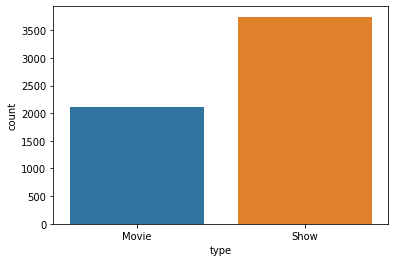

In [128]:
p1 = sns.countplot(x='type', data=Netflix_Data) 
p1.set_xticklabels(['Movie', 'Show'])
p1.axes.set(xlabel='type', ylabel='count')

In [129]:
Netflix_Data.groupby('type')['type'].count()/len(Netflix_Data)

type
MOVIE    0.64
SHOW     0.36
Name: type, dtype: float64

In [130]:
df_age_certification = pd.DataFrame( Netflix_Data.groupby('age_certification')['age_certification'].count().reset_index(name='count') ) 

df_age_certification['prop'] = df_age_certification['count'] / len(Netflix_Data)

df_age_certification = df_age_certification.sort_values(by='prop' , ascending=False)

df_age_certification

,age_certification,count,prop
7,TV-MA,883,0.150940
4,R,556,0.095043
5,TV-14,474,0.081026
3,PG-13,451,0.077094
2,PG,233,0.039829
8,TV-PG,188,0.032137
0,G,124,0.021197
10,TV-Y7,120,0.020513
9,TV-Y,107,0.018291
6,TV-G,79,0.013504


In [131]:
df_genres = pd.DataFrame( Netflix_Data.groupby('genres')['genres'].count().reset_index(name='count') ) 

df_genres['prop'] = df_genres['count'] / len(Netflix_Data)

df_genres['cum_prop'] = df_genres['prop'].cumsum()

df_genres.head(10)

,genres,count,prop,cum_prop
0,"['action', 'animation', 'comedy', 'drama', 'fa...",1,0.000171,0.000171
1,"['action', 'animation', 'comedy', 'drama', 'fa...",2,0.000342,0.000513
2,"['action', 'animation', 'comedy', 'family', 'f...",2,0.000342,0.000855
3,"['action', 'animation', 'comedy', 'family', 'm...",1,0.000171,0.001026
4,"['action', 'animation', 'comedy', 'family']",4,0.000684,0.001709
5,"['action', 'animation', 'comedy', 'fantasy', '...",1,0.000171,0.001880
6,"['action', 'animation', 'comedy', 'fantasy']",1,0.000171,0.002051
7,"['action', 'animation', 'comedy', 'thriller', ...",1,0.000171,0.002222
8,"['action', 'animation', 'comedy']",1,0.000171,0.002393
9,"['action', 'animation', 'drama']",1,0.000171,0.002564


In [132]:
df_genres.sort_values(by='prop' , ascending=False)

,genres,count,prop,cum_prop
563,['comedy'],484,0.082735,0.339658
715,['documentation'],329,0.056239,0.494017
1061,['drama'],328,0.056068,0.736923
458,"['comedy', 'drama']",135,0.023077,0.202393
959,"['drama', 'romance']",124,0.021197,0.640855
...,...,...,...,...
720,"['drama', 'action', 'comedy', 'romance', 'thri...",1,0.000171,0.494872
719,"['drama', 'action', 'comedy', 'romance', 'crime']",1,0.000171,0.494701
718,"['drama', 'action', 'comedy', 'family']",1,0.000171,0.494530
717,"['drama', 'action', 'comedy', 'crime']",1,0.000171,0.494359


In [133]:
df_production_countries = pd.DataFrame( Netflix_Data.groupby('production_countries')['production_countries'].count().reset_index(name='count') ) 

df_production_countries['prop'] = df_production_countries['count'] / len(Netflix_Data)

df_production_countries['cum_prop'] = df_production_countries['prop'].cumsum()

df_production_countries.head(10)

,production_countries,count,prop,cum_prop
0,"['AE', 'FR', 'JO', 'LB', 'QA', 'PS']",1,0.000171,0.000171
1,"['AE', 'LB']",2,0.000342,0.000513
2,"['AE', 'US']",1,0.000171,0.000684
3,['AE'],11,0.001880,0.002564
4,"['AF', 'DE', 'PS']",1,0.000171,0.002735
5,['AF'],1,0.000171,0.002906
6,"['AR', 'CL']",1,0.000171,0.003077
7,"['AR', 'CO']",1,0.000171,0.003248
8,"['AR', 'DE', 'UY', 'ES']",1,0.000171,0.003419
9,"['AR', 'ES', 'UY']",1,0.000171,0.003590


In [134]:
df_production_countries.sort_values(by='prop' , ascending=False)

,production_countries,count,prop,cum_prop
438,['US'],1959,0.334872,0.949060
237,['IN'],599,0.102393,0.370769
264,['JP'],264,0.045128,0.431453
451,[],229,0.039145,1.000000
269,['KR'],222,0.037949,0.470598
...,...,...,...,...
167,"['FR', 'NL', 'SG']",1,0.000171,0.170427
166,"['FR', 'NL', 'GB', 'US']",1,0.000171,0.170256
165,"['FR', 'MX', 'ES']",1,0.000171,0.170085
164,"['FR', 'MX', 'CO']",1,0.000171,0.169915


In [135]:
df_release_year = pd.DataFrame( Netflix_Data.groupby('release_year')['release_year'].count().reset_index(name='count') ) 

df_release_year['prop'] = df_release_year['count'] / len(Netflix_Data)

df_release_year['cum_prop'] = df_release_year['prop'].cumsum()

df_release_year.head(10)

,release_year,count,prop,cum_prop
0,1945,1,0.000171,0.000171
1,1954,2,0.000342,0.000513
2,1956,1,0.000171,0.000684
3,1958,1,0.000171,0.000855
4,1959,1,0.000171,0.001026
5,1960,1,0.000171,0.001197
6,1961,1,0.000171,0.001368
7,1963,1,0.000171,0.001538
8,1966,1,0.000171,0.001709
9,1967,2,0.000342,0.002051


In [136]:
df_release_year.sort_values(by='prop' , ascending=False)

,release_year,count,prop,cum_prop
59,2019,836,0.142906,0.662906
60,2020,814,0.139145,0.802051
61,2021,787,0.134530,0.936581
58,2018,773,0.132137,0.520000
57,2017,563,0.096239,0.387863
...,...,...,...,...
13,1973,1,0.000171,0.003248
14,1974,1,0.000171,0.003419
17,1977,1,0.000171,0.004444
25,1985,1,0.000171,0.009402


In [137]:
df_seasons = pd.DataFrame( Netflix_Data.groupby('seasons')['seasons'].count().reset_index(name='count') ) 

n_shows = ((1-0.64)*len(Netflix_Data))

df_seasons['prop'] = df_seasons['count'] / n_shows

df_seasons['cum_prop'] = df_seasons['prop'].cumsum()

df_seasons.head(10)

,seasons,count,prop,cum_prop
0,1.0,1221,0.579772,0.579772
1,2.0,389,0.184710,0.764482
2,3.0,187,0.088794,0.853276
3,4.0,120,0.056980,0.910256
4,5.0,79,0.037512,0.947768
5,6.0,36,0.017094,0.964862
6,7.0,18,0.008547,0.973409
7,8.0,11,0.005223,0.978632
8,9.0,9,0.004274,0.982906
9,10.0,6,0.002849,0.985755


In [138]:
df_seasons.sort_values(by='prop' , ascending=False)

,seasons,count,prop,cum_prop
0,1.0,1221,0.579772,0.579772
1,2.0,389,0.184710,0.764482
2,3.0,187,0.088794,0.853276
3,4.0,120,0.056980,0.910256
4,5.0,79,0.037512,0.947768
5,6.0,36,0.017094,0.964862
6,7.0,18,0.008547,0.973409
7,8.0,11,0.005223,0.978632
8,9.0,9,0.004274,0.982906
10,11.0,8,0.003799,0.989554


In [139]:
intervals = [Netflix_Data['imdb_score'].min(), Netflix_Data['imdb_score'].quantile(0.25), Netflix_Data['imdb_score'].quantile(0.5) , Netflix_Data['imdb_score'].quantile(0.75) , Netflix_Data['imdb_score'].max()]

Netflix_Data['imdb_score_recode']  = pd.cut(x=Netflix_Data['imdb_score'] , bins=intervals )

df_imdb_score_recode = pd.DataFrame( Netflix_Data.groupby('imdb_score_recode')['imdb_score_recode'].count().reset_index(name='count') ) 

df_imdb_score_recode['prop'] = df_imdb_score_recode['count'] / len(Netflix_Data)

df_imdb_score_recode['cum_prop'] = df_imdb_score_recode['prop'].cumsum()

df_imdb_score_recode.head(10)

,imdb_score_recode,count,prop,cum_prop
0,"(1.5, 5.8]",1414,0.241709,0.241709
1,"(5.8, 6.6]",1328,0.227009,0.468718
2,"(6.6, 7.3]",1302,0.222564,0.691282
3,"(7.3, 9.6]",1323,0.226154,0.917436


In [140]:
df_imdb_score_recode.sort_values(by='prop' , ascending=False)

,imdb_score_recode,count,prop,cum_prop
0,"(1.5, 5.8]",1414,0.241709,0.241709
1,"(5.8, 6.6]",1328,0.227009,0.468718
3,"(7.3, 9.6]",1323,0.226154,0.917436
2,"(6.6, 7.3]",1302,0.222564,0.691282


In [141]:
intervals = [Netflix_Data['imdb_votes'].min(), Netflix_Data['imdb_votes'].quantile(0.25), Netflix_Data['imdb_votes'].quantile(0.5) , Netflix_Data['imdb_votes'].quantile(0.75) , Netflix_Data['imdb_votes'].max()]

Netflix_Data['imdb_votes_recode']  = pd.cut(x=Netflix_Data['imdb_votes'] , bins=intervals )

df_imdb_votes_recode = pd.DataFrame( Netflix_Data.groupby('imdb_votes_recode')['imdb_votes_recode'].count().reset_index(name='count') ) 

df_imdb_votes_recode['prop'] = df_imdb_votes_recode['count'] / len(Netflix_Data)

df_imdb_votes_recode['cum_prop'] = df_imdb_votes_recode['prop'].cumsum()

df_imdb_votes_recode.head(10)

,imdb_votes_recode,count,prop,cum_prop
0,"(5.0, 516.75]",1332,0.227692,0.227692
1,"(516.75, 2233.5]",1338,0.228718,0.456410
2,"(2233.5, 9494.0]",1338,0.228718,0.685128
3,"(9494.0, 2294231.0]",1338,0.228718,0.913846


In [142]:
df_imdb_votes_recode.sort_values(by='prop' , ascending=False)

,imdb_votes_recode,count,prop,cum_prop
1,"(516.75, 2233.5]",1338,0.228718,0.456410
2,"(2233.5, 9494.0]",1338,0.228718,0.685128
3,"(9494.0, 2294231.0]",1338,0.228718,0.913846
0,"(5.0, 516.75]",1332,0.227692,0.227692


In [143]:
intervals = [Netflix_Data['tmdb_popularity'].min(), Netflix_Data['tmdb_popularity'].quantile(0.25), Netflix_Data['tmdb_popularity'].quantile(0.5) , Netflix_Data['tmdb_popularity'].quantile(0.75) , Netflix_Data['tmdb_popularity'].max()]

Netflix_Data['tmdb_popularity_recode']  = pd.cut(x=Netflix_Data['tmdb_popularity'] , bins=intervals )

df_tmdb_popularity_recode = pd.DataFrame( Netflix_Data.groupby('tmdb_popularity_recode')['tmdb_popularity_recode'].count().reset_index(name='count') ) 

df_tmdb_popularity_recode['prop'] = df_tmdb_popularity_recode['count'] / len(Netflix_Data)

df_tmdb_popularity_recode['cum_prop'] = df_tmdb_popularity_recode['prop'].cumsum()

df_tmdb_popularity_recode.head(10)

,tmdb_popularity_recode,count,prop,cum_prop
0,"(0.00944, 2.728]",1439,0.245983,0.245983
1,"(2.728, 6.821]",1440,0.246154,0.492137
2,"(6.821, 16.59]",1439,0.245983,0.738120
3,"(16.59, 2274.044]",1440,0.246154,0.984274


In [144]:
df_tmdb_popularity_recode.sort_values(by='prop' , ascending=False)

,tmdb_popularity_recode,count,prop,cum_prop
1,"(2.728, 6.821]",1440,0.246154,0.492137
3,"(16.59, 2274.044]",1440,0.246154,0.984274
0,"(0.00944, 2.728]",1439,0.245983,0.245983
2,"(6.821, 16.59]",1439,0.245983,0.738120


In [145]:
intervals = [Netflix_Data['tmdb_score'].min(), Netflix_Data['tmdb_score'].quantile(0.25), Netflix_Data['tmdb_score'].quantile(0.5) , Netflix_Data['tmdb_score'].quantile(0.75) , Netflix_Data['tmdb_score'].max()]

Netflix_Data['tmdb_score_recode']  = pd.cut(x=Netflix_Data['tmdb_score'] , bins=intervals )

df_tmdb_score_recode = pd.DataFrame( Netflix_Data.groupby('tmdb_score_recode')['tmdb_score_recode'].count().reset_index(name='count') ) 

df_tmdb_score_recode['prop'] = df_tmdb_score_recode['count'] / len(Netflix_Data)

df_tmdb_score_recode['cum_prop'] = df_tmdb_score_recode['prop'].cumsum()

df_tmdb_score_recode.head(10)

,tmdb_score_recode,count,prop,cum_prop
0,"(0.5, 6.1]",1400,0.239316,0.239316
1,"(6.1, 6.9]",1472,0.251624,0.490940
2,"(6.9, 7.538]",1281,0.218974,0.709915
3,"(7.538, 10.0]",1385,0.236752,0.946667


In [146]:
df_tmdb_score_recode.sort_values(by='prop' , ascending=False)

,tmdb_score_recode,count,prop,cum_prop
1,"(6.1, 6.9]",1472,0.251624,0.490940
0,"(0.5, 6.1]",1400,0.239316,0.239316
3,"(7.538, 10.0]",1385,0.236752,0.946667
2,"(6.9, 7.538]",1281,0.218974,0.709915


In [161]:
runtime_show = Netflix_Data.loc[ Netflix_Data['type']=='SHOW' , 'runtime']
runtime_movie = Netflix_Data.loc[ Netflix_Data['type']=='MOVIE' , 'runtime']

Netflix_Data['runtime_show'] = runtime_show
Netflix_Data['runtime_movie'] = runtime_movie

In [167]:
intervals = [Netflix_Data['runtime_show'].min(), Netflix_Data['runtime_show'].quantile(0.25), Netflix_Data['runtime_show'].quantile(0.5) , Netflix_Data['runtime_show'].quantile(0.75) , Netflix_Data['runtime_show'].max()]

Netflix_Data['runtime_show_recode']  = pd.cut(x=Netflix_Data['runtime_show'] , bins=intervals )

df_runtime_show = pd.DataFrame( Netflix_Data.groupby('runtime_show_recode')['runtime_show_recode'].count().reset_index(name='count') ) 

n_show = len(Netflix_Data.loc[Netflix_Data['type']=='SHOW', ])

df_runtime_show['prop'] = df_runtime_show['count'] / n_show

df_runtime_show['cum_prop'] = df_runtime_show['prop'].cumsum()

df_runtime_show.head(10)

,runtime_show_recode,count,prop,cum_prop
0,"(0.0, 25.0]",571,0.271130,0.271130
1,"(25.0, 41.0]",474,0.225071,0.496201
2,"(41.0, 49.0]",536,0.254511,0.750712
3,"(49.0, 190.0]",511,0.242640,0.993352


In [174]:
Netflix_Data['runtime_show_recode']  = pd.cut(x=Netflix_Data['runtime_show'] , bins=8 )

df_runtime_show = pd.DataFrame( Netflix_Data.groupby('runtime_show_recode')['runtime_show_recode'].count().reset_index(name='count') ) 

n_show = len(Netflix_Data.loc[Netflix_Data['type']=='SHOW', ])

df_runtime_show['prop'] = df_runtime_show['count'] / n_show

df_runtime_show['cum_prop'] = df_runtime_show['prop'].cumsum()

df_runtime_show.head(10)

,runtime_show_recode,count,prop,cum_prop
0,"(-0.19, 23.75]",382,0.181387,0.181387
1,"(23.75, 47.5]",1108,0.526116,0.707502
2,"(47.5, 71.25]",556,0.264008,0.971510
3,"(71.25, 95.0]",52,0.024691,0.996201
4,"(95.0, 118.75]",4,0.001899,0.998101
5,"(118.75, 142.5]",2,0.000950,0.999050
6,"(142.5, 166.25]",0,0.000000,0.999050
7,"(166.25, 190.0]",2,0.000950,1.000000


In [169]:
intervals = [Netflix_Data['runtime_movie'].min(), Netflix_Data['runtime_movie'].quantile(0.25), Netflix_Data['runtime_movie'].quantile(0.5) , Netflix_Data['runtime_movie'].quantile(0.75) , Netflix_Data['runtime_movie'].max()]

Netflix_Data['runtime_movie_recode']  = pd.cut(x=Netflix_Data['runtime_movie'] , bins=intervals )

df_runtime_movie_recode= pd.DataFrame( Netflix_Data.groupby('runtime_movie_recode')['runtime_movie_recode'].count().reset_index(name='count') ) 

n_movie = len(Netflix_Data.loc[Netflix_Data['type']=='MOVIE', ])

df_runtime_movie_recode['prop'] = df_runtime_movie_recode['count'] / n_movie

df_runtime_movie_recode['cum_prop'] = df_runtime_movie_recode['prop'].cumsum()

df_runtime_movie_recode.head(10)

,runtime_movie_recode,count,prop,cum_prop
0,"(2.0, 85.0]",952,0.254274,0.254274
1,"(85.0, 98.0]",942,0.251603,0.505876
2,"(98.0, 115.0]",944,0.252137,0.758013
3,"(115.0, 240.0]",905,0.241720,0.999733


In [172]:
Netflix_Data['runtime_movie_recode']  = pd.cut(x=Netflix_Data['runtime_movie'] , bins=6 )

df_runtime_movie_recode= pd.DataFrame( Netflix_Data.groupby('runtime_movie_recode')['runtime_movie_recode'].count().reset_index(name='count') ) 

n_movie = len(Netflix_Data.loc[Netflix_Data['type']=='MOVIE', ])

df_runtime_movie_recode['prop'] = df_runtime_movie_recode['count'] / n_movie

df_runtime_movie_recode['cum_prop'] = df_runtime_movie_recode['prop'].cumsum()

df_runtime_movie_recode.head(10)

,runtime_movie_recode,count,prop,cum_prop
0,"(1.762, 41.667]",187,0.049947,0.049947
1,"(41.667, 81.333]",621,0.165865,0.215812
2,"(81.333, 121.0]",2238,0.597756,0.813568
3,"(121.0, 160.667]",597,0.159455,0.973024
4,"(160.667, 200.333]",93,0.024840,0.997863
5,"(200.333, 240.0]",8,0.002137,1.000000
